In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')

# from jupyterthemes import jtplot
# jtplot.style()
# jtplot.style( fscale=1.4, spines=False, gridlines='--',figsize=(10.7,8.27))

%matplotlib inline

import os
# os.chdir("/Users/alexandrabazyleva/Downloads/машинка/")

# Претендент на должность

In [23]:
df = pd.read_csv('assess.dat', sep = '\t', index_col='NAME')
print(df.shape)
df.head()

(18, 11)


,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [24]:
df.drop('NR', axis = 1, inplace = True)

In [25]:
df.columns = ['Память на числа', 'Умение решать математические задачи', 'Находчивость при прямом диалоге', 
              'Умение составлять алгоритмы', 'Уверенность во время выступления', 
              'Командный дух', 
              'Находчивость', 
              'Сотрудничество', 
              'Признание в коллективе', 
              'Сила убеждения']

In [26]:
df.head()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
NAME,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9
Sigrid,10,10,4,10,5,5,4,5,4,3
Elmar,5,4,10,5,10,4,10,5,3,10
Peter,10,10,9,10,10,10,9,10,10,9
Otto,4,3,5,4,3,10,4,10,10,5


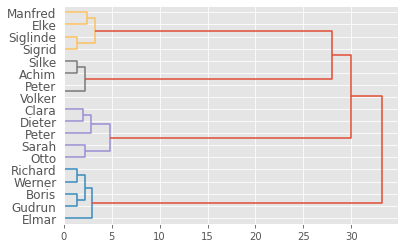

In [27]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link,
                  labels = df.index.to_list(),
                  truncate_mode='lastp', 
                  color_threshold=5,
                  orientation = "right",
                  leaf_rotation=0.)

In [28]:
df['cluster'] = fcluster(link, 4, criterion='maxclust')
df

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения,cluster
NAME,,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9,3
Sigrid,10,10,4,10,5,5,4,5,4,3,4
Elmar,5,4,10,5,10,4,10,5,3,10,1
Peter,10,10,9,10,10,10,9,10,10,9,3
Otto,4,3,5,4,3,10,4,10,10,5,2
Elke,10,10,4,10,5,4,3,4,5,5,4
Sarah,4,4,5,5,4,10,5,10,10,6,2
Peter,4,5,3,4,5,10,4,10,10,4,2
Gudrun,4,5,10,4,10,5,10,4,3,10,1


In [29]:
df.groupby('cluster').mean()

,Память на числа,Умение решать математические задачи,Находчивость при прямом диалоге,Умение составлять алгоритмы,Уверенность во время выступления,Командный дух,Находчивость,Сотрудничество,Признание в коллективе,Сила убеждения
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


Кластер 1 - Менеджер
Кластер 2 - Тим лид
Кластер 3 - Дата сайнтист, аналитик данных, бизнес-аналитик
Кластер 4 - программист

In [30]:
df[df.cluster == 2].groupby('cluster').mean().T

cluster,2
Память на числа,4.8
Умение решать математические задачи,4.4
Находчивость при прямом диалоге,4.0
Умение составлять алгоритмы,4.0
Уверенность во время выступления,4.2
Командный дух,10.0
Находчивость,4.4
Сотрудничество,10.0
Признание в коллективе,10.0
Сила убеждения,5.0


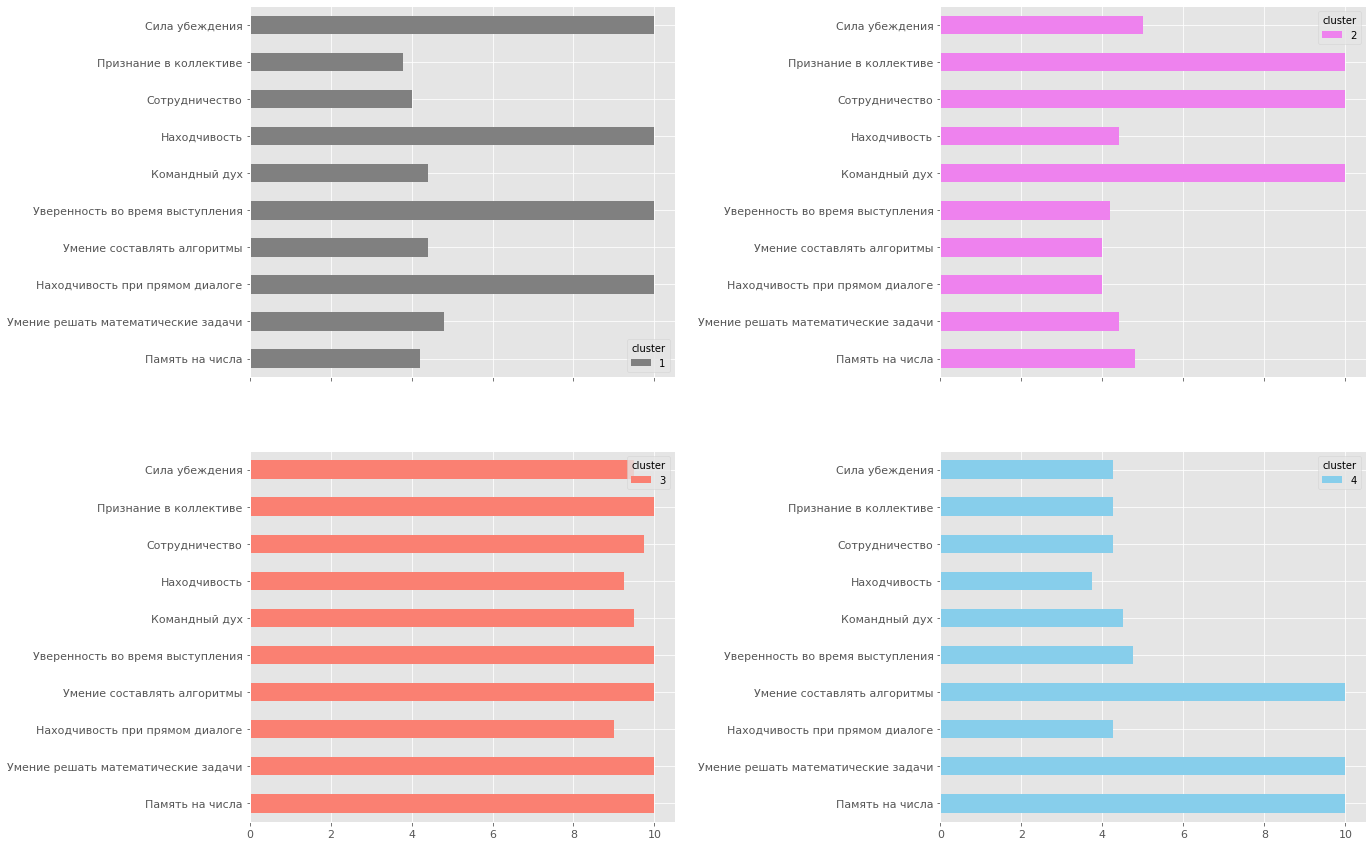

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(20, 15)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        k += 1
        df[df.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

# Потребление протеинов в Европе

In [32]:
prot = pd.read_csv('Protein Consumption in Europe.csv', sep = ';', decimal=',', index_col='Country')
prot.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


# Стандартизируем данные

In [33]:
scaler = preprocessing.StandardScaler()
scaler.fit(prot) # Вычисляем параметры нормализации
X = scaler.transform(prot) # Преобразуем данные с параметрами
prot_scaler = pd.DataFrame(X, index = prot.index, columns = prot.columns)
prot_scaler.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


In [34]:
prot.shape, prot_scaler.shape

((25, 9), (25, 9))

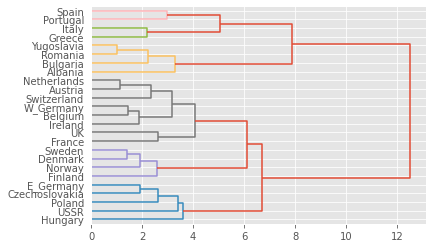

In [35]:
link = linkage(prot_scaler, 'ward', 'euclidean')
dend = dendrogram(link,
                  labels = prot_scaler.index.to_list(),
                  truncate_mode='lastp', 
                  color_threshold=5,
                  orientation = "right",
                  leaf_rotation=0.)

Из дендограммы можно предположить, что будет использовать примерно 5 кластеров

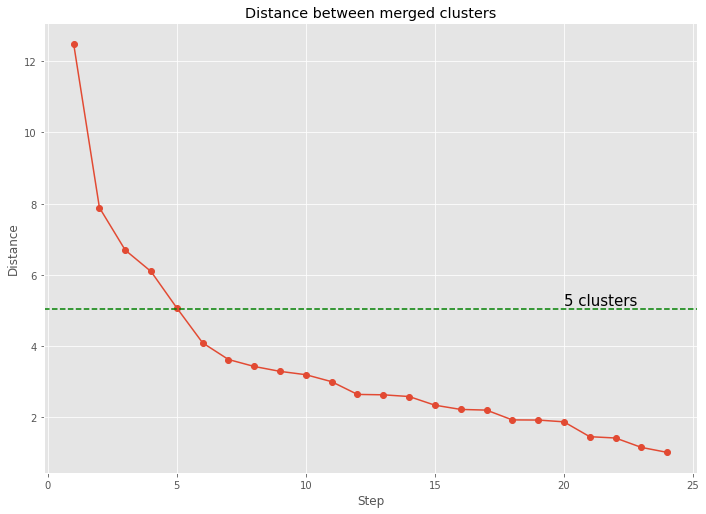

In [43]:
# построение каменистой осыпи
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(5.05, c='g', linestyle='dashed')

plt.text(20, 5.15, '5 clusters', size = 15)

plt.show()

График каменистой осыпи показал (как и предполагалось), будет использоваваться 5 класстеров

In [44]:
prot['cluster'] = fcluster(link, 5, criterion='maxclust')
prot

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster
Country,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,4
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,4
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,1
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3


In [45]:
prot.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
5,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075


In [49]:
prot.groupby('cluster').size()

cluster
1    5
2    4
3    8
4    4
5    4
dtype: int64

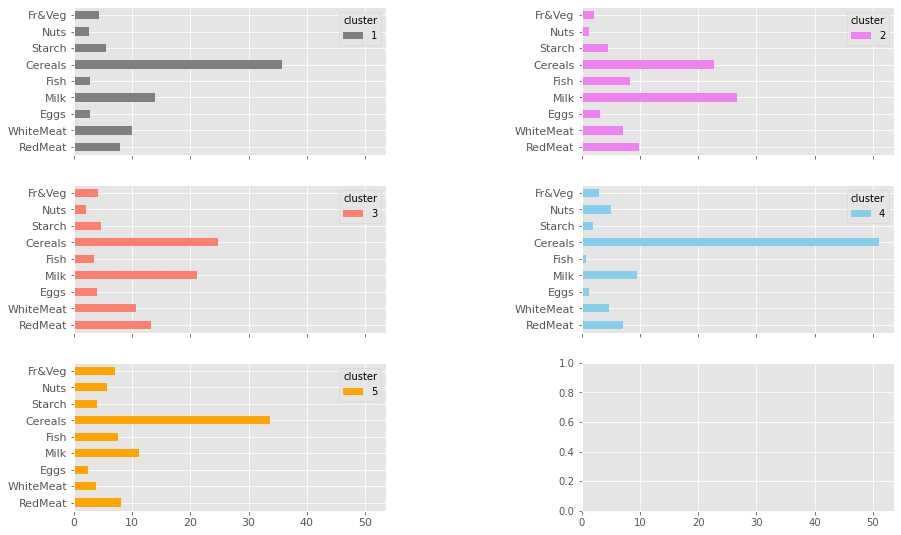

In [64]:
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True)
fig.set_size_inches(14.7, 9.27)
plt.subplots_adjust( wspace=0.625)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for i in range(3):
    for j in range(2):
        if i == 2 and j == 1:
            break
        ax = axs[i, j]
        k += 1
        prot[prot.cluster == k].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
        ax.tick_params(labelsize = 11)

In [66]:
prot['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

- Кластер 1 - Страны с социалистическим режимом.

- Кластер 2 - Скандинавские страны.

- Кластер 3 - Западноевропейские страны.

- Кластер 4 - Балканские страны.

- Кластер 5 - Южноевропейские страны.

# Beverage (Напиток)

In [72]:
bev = pd.read_csv('beverage_r.csv', sep = ';', decimal = ',', index_col='numb.obs')
bev.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [73]:
bev.isnull().sum()

COKE       0
D_COKE     0
D_PEPSI    0
D_7UP      0
PEPSI      0
SPRITE     0
TAB        0
SEVENUP    0
dtype: int64

In [74]:
bev.shape

(34, 8)

Стандартизацию проводить не следует, так как данные лежат в одной шкале

# Кластеризация методов k-means

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
K = range(1, 19)
models = [KMeans(n_clusters=k, random_state=42).fit(df.iloc[:, :-1]) for k in K]
dist = [model.inertia_ for model in models]
dist

[1434.3333333333333,
 882.1846153846154,
 434.3,
 41.8,
 30.299999999999997,
 24.8,
 20.8,
 17.166666666666664,
 13.5,
 11.0,
 8.5,
 6.000000000000001,
 4.000000000000001,
 3.0,
 2.0,
 1.0,
 0.0,
 0.0]

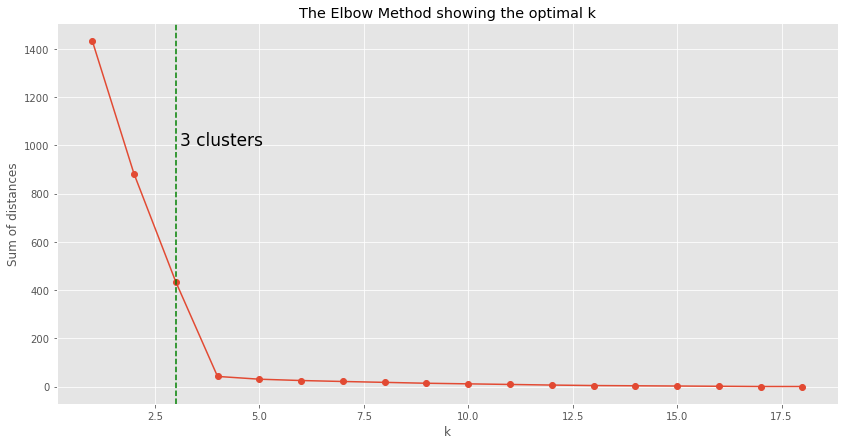

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.axvline(3, c='g', linestyle='dashed')
plt.text(3.1, 1000.1, '3 clusters', size = 17)
plt.title('The Elbow Method showing the optimal k')
plt.show()

Неирархический метод k-mens показывает, что оптимальное кол-во кластеров явялется 3

In [85]:
model_opt = KMeans(n_clusters = 3, random_state = 42)
model_opt.fit(bev)
model_opt.labels_ # Метод опеределения кластера для каждого экзмепляра

array([2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0])

In [88]:
len(model_opt.labels_), len(model_opt.labels_) == bev.shape[0]

(34, True)

In [90]:
bev['cluster'] = model_opt.labels_
bev.head(10)

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,2
2,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,0,1
4,0,1,0,1,0,0,1,0,0
5,1,0,0,0,1,0,0,0,1
6,1,0,0,0,1,1,0,0,2
7,0,1,1,1,0,0,1,0,0
8,1,1,0,0,1,1,0,1,2
9,1,1,0,0,0,1,1,1,2


In [91]:
bev.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
1,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


In [92]:
bev.groupby('cluster').size()

cluster
0    11
1    12
2    11
dtype: int64

In [93]:
sum(bev.groupby('cluster').size()) == bev.shape[0] 

True

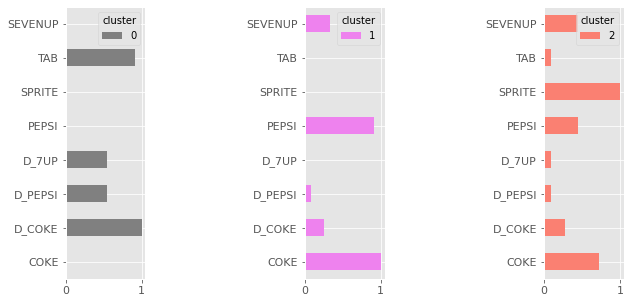

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_size_inches(10, 5)
plt.subplots_adjust(wspace = 2)
k = 0
c = ['grey', 'violet', 'salmon', 'skyblue', 'orange']
for j in range(3):
    ax = axs[j]
    k += 1
    bev[bev.cluster == k-1].groupby('cluster').mean().T.plot.barh(ax = ax, color = c[k-1])
    ax.tick_params(labelsize = 11)

In [117]:
bev[bev.cluster == 2].groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


- Кластер 0 - Люди, предпочитающие диетические напитки;

- Кластер 1 - Люди, предпочитающие обычные напитки, кроме Sprite;

- Кластер 2 - Люди, предпочитающие обычные напитки, но в особенности Spite